### Baseball Case Study

In [1]:
# Importing basic libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Loading the data 
baseball=pd.read_csv('baseball.csv')
print(baseball)

      W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  26  230  486  1392  121  618  572

In [3]:
baseball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
baseball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [5]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


##### Comparing number of wins with Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average, Shutouts, Saves with the help of Matplotlib

In [6]:
## Import data visualization
import matplotlib.pyplot as plt
%matplotlib inline

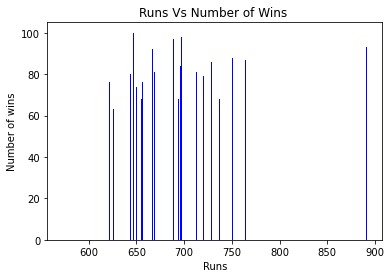

In [7]:
plt.bar("R", "W",data=baseball ,color = "blue")
plt.xlabel("Runs")
plt.ylabel("Number of wins")
plt.title("Runs Vs Number of Wins ")
plt.show()

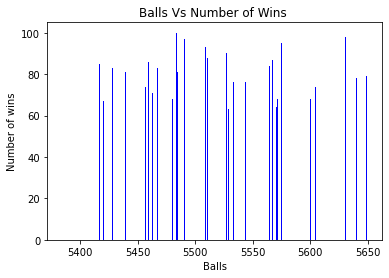

In [8]:
plt.bar("AB", "W",data=baseball ,color = "blue")
plt.xlabel("Balls")
plt.ylabel("Number of wins")
plt.title("Balls Vs Number of Wins ")
plt.show()

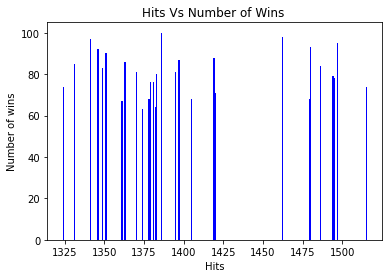

In [9]:
plt.bar("H", "W",data=baseball ,color = "blue")
plt.xlabel("Hits")
plt.ylabel("Number of wins")
plt.title("Hits Vs Number of Wins ")
plt.show()

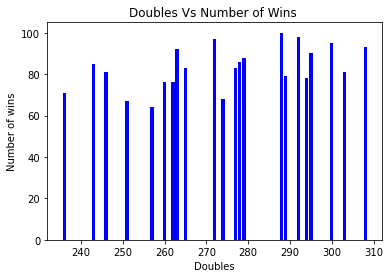

In [10]:
plt.bar("2B", "W",data=baseball ,color = "blue")
plt.xlabel("Doubles")
plt.ylabel("Number of wins")
plt.title("Doubles Vs Number of Wins ")
plt.show()

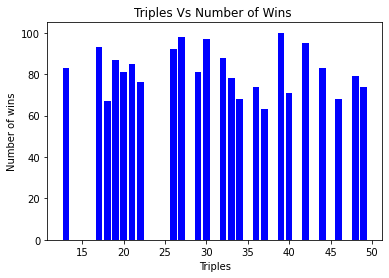

In [11]:
plt.bar("3B", "W",data=baseball ,color = "blue")
plt.xlabel("Triples")
plt.ylabel("Number of wins")
plt.title("Triples Vs Number of Wins ")
plt.show()

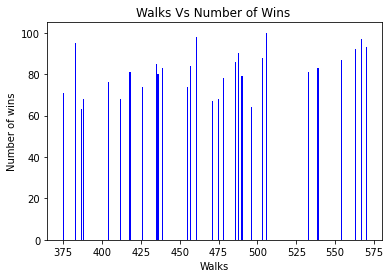

In [12]:
plt.bar("BB", "W",data=baseball ,color = "blue")
plt.xlabel("Walks")
plt.ylabel("Number of wins")
plt.title("Walks Vs Number of Wins ")
plt.show()

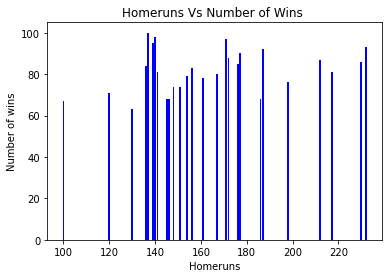

In [13]:
plt.bar("HR", "W",data=baseball ,color = "blue")
plt.xlabel("Homeruns")
plt.ylabel("Number of wins")
plt.title("Homeruns Vs Number of Wins ")
plt.show()

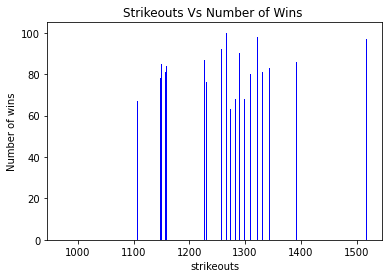

In [14]:
plt.bar("SO", "W",data=baseball ,color = "blue")
plt.xlabel("strikeouts")
plt.ylabel("Number of wins")
plt.title("Strikeouts Vs Number of Wins ")
plt.show()

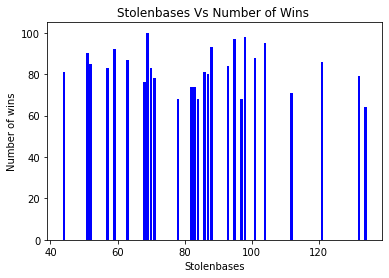

In [15]:
plt.bar("SB", "W",data=baseball ,color = "blue")
plt.xlabel("Stolenbases")
plt.ylabel("Number of wins")
plt.title("Stolenbases Vs Number of Wins ")
plt.show()

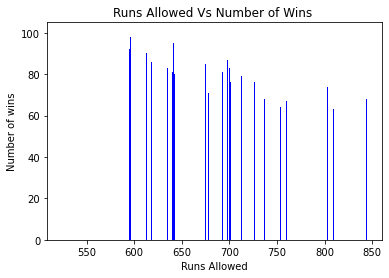

In [16]:
plt.bar("RA", "W",data=baseball ,color = "blue")
plt.xlabel("Runs Allowed")
plt.ylabel("Number of wins")
plt.title("Runs Allowed Vs Number of Wins ")
plt.show()

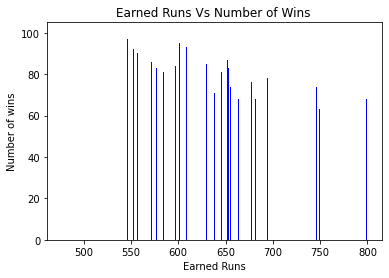

In [17]:
plt.bar("ER", "W",data=baseball ,color = "blue")
plt.xlabel("Earned Runs")
plt.ylabel("Number of wins")
plt.title("Earned Runs Vs Number of Wins ")
plt.show()

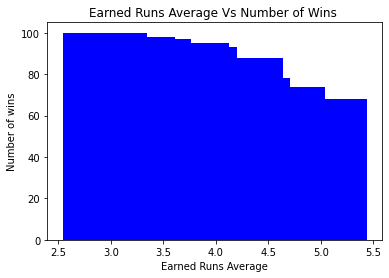

In [18]:
plt.bar("ERA", "W",data=baseball ,color = "blue")
plt.xlabel("Earned Runs Average")
plt.ylabel("Number of wins")
plt.title("Earned Runs Average Vs Number of Wins ")
plt.show()

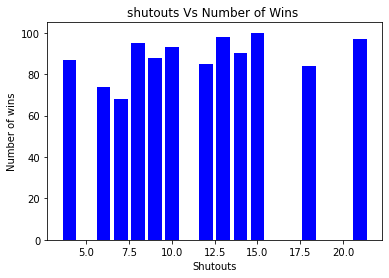

In [19]:
plt.bar("SHO", "W",data=baseball ,color = "blue")
plt.xlabel("Shutouts")
plt.ylabel("Number of wins")
plt.title("shutouts Vs Number of Wins ")
plt.show()

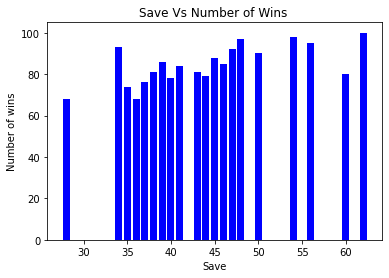

In [20]:
plt.bar("SV", "W",data=baseball ,color = "blue")
plt.xlabel("Save")
plt.ylabel("Number of wins")
plt.title("Save Vs Number of Wins ")
plt.show()

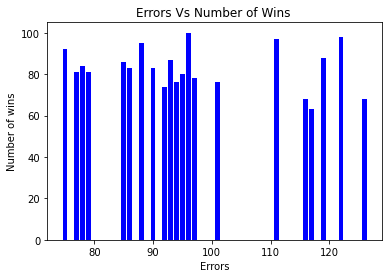

In [21]:
plt.bar("E", "W",data=baseball,color = "blue")
plt.xlabel("Errors")
plt.ylabel("Number of wins")
plt.title("Errors Vs Number of Wins ")
plt.show()

In [22]:
#lets see how each of the variables is correlated with the target variable.
baseball.corr()['W']

W      1.000000
R      0.430751
AB    -0.087947
H      0.037612
2B     0.427797
3B    -0.251118
HR     0.307407
BB     0.484342
SO     0.111850
SB    -0.157234
RA    -0.812952
ER    -0.809435
ERA   -0.819600
CG     0.080533
SHO    0.471805
SV     0.666530
E     -0.089485
Name: W, dtype: float64

In [23]:
for column in baseball.columns:
    if baseball[column].dtype == object:
        print(str(column) + ' : ' + str(baseball[column].unique()))
        print(baseball[column].value_counts())
        print("_________________________________________________________________")

In [24]:
#Split the data into independent 'X' and dependent 'Y' variables
X = baseball.iloc[:, 1:baseball.shape[1]].values 
Y = baseball.iloc[:, 0].values 

In [25]:
# Split the dataset into 75% Training set and 25% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [26]:
#Use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
bb = RandomForestClassifier(n_estimators = 10, random_state = 0)
bb.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [27]:
#Get the accuracy on the training data
bb.score(X_train, Y_train)

1.0

In [28]:
#Show the confusion matrix and accuracy of the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, bb.predict(X_test))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))
print()

[[0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]
Model Testing Accuracy = "nan!"



In [37]:
# Import necessary modules from `sklearn` 
from sklearn.cluster import KMeans
from sklearn import metrics

# Create silhouette score dictionary
s_score_dict = {}
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    l = km.fit_predict(baseball)
    s_s = metrics.silhouette_score(baseball, l)
    s_score_dict[i] = [s_s]

# Print out `s_score_dict`
print(s_score_dict)

{2: [0.19987395830177135], 3: [0.19367511526637032], 4: [0.20534252359995925], 5: [0.19225361856772363], 6: [0.16915810456354752], 7: [0.17853672357167702], 8: [0.19221282760051234], 9: [0.19195420257562598], 10: [0.15022753617670467]}


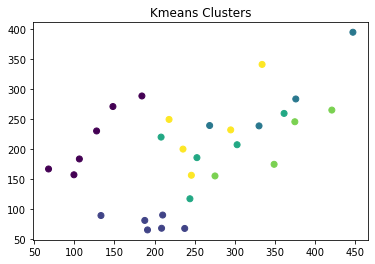

In [38]:
# Create K-means model and determine euclidian distances for each data point
kmeans_model = KMeans(n_clusters=6, random_state=1)
distances = kmeans_model.fit_transform(baseball)

# Create scatter plot using labels from K-means model as color
labels = kmeans_model.labels_

plt.scatter(distances[:,0], distances[:,1], c=labels)
plt.title('Kmeans Clusters')

plt.show()

In [43]:
# Create new DataFrame using only variables to be included in models
numeric_cols = ['R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','CG','SHO','SV','E','W']
data = baseball[numeric_cols]
print(data.head())

# Split data DataFrame into train and test sets
train = data.sample(frac=0.75, random_state=1)
test = data.loc[~data.index.isin(train.index)]

x_train = train[numeric_cols]
y_train = train['W']
x_test = test[numeric_cols]
y_test = test['W']

     R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER  CG  SHO  SV    E  \
0  724  5575  1497  300  42  139  383   973  104  641  601   2    8  56   88   
1  696  5467  1349  277  44  156  439  1264   70  700  653   2   12  45   86   
2  669  5439  1395  303  29  141  533  1157   86  640  584  11   10  38   79   
3  622  5533  1381  260  27  136  404  1231   68  701  643   7    9  37  101   
4  689  5605  1515  289  49  151  455  1259   83  803  746   7   12  35   86   

    W  
0  95  
1  83  
2  81  
3  76  
4  74  


# Selecting Error Metric and Model
#### Mean Absolute Error (MAE) is the metric you’ll use to determine how accurate your model is. It measures how close the predictions are to the eventual outcomes. Specifically, for this data, that means that this error metric will provide you with the average absolute value that your prediction missed its mark.

In [49]:
from sklearn.linear_model import LinearRegression

# Import mean_absolute_error from sklearn.metrics
from sklearn.metrics import mean_absolute_error

# Create Linear Regression model, fit model, and make predictions
lr = LinearRegression(normalize=True)
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

# Determine mean absolute error
mae = mean_absolute_error(y_test, predictions)

# Print `mae`
print(mae)

1.4210854715202004e-14


In [51]:
# Import RidgeCV from sklearn.linear_model
from sklearn.linear_model import RidgeCV

# Create Ridge Linear Regression model, fit model, and make predictions
rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)
rrm.fit(x_train, y_train)
predictions_rrm = rrm.predict(x_test)

# Determine mean absolute error
mae_rrm = mean_absolute_error(y_test, predictions_rrm)
print(mae_rrm)

0.7533082124117279


### If we recall from above, the average number of wins was about 75 wins. On average, the model is off by only 1.42 wins.